In [1]:
import numpy as np
import folium 
import matplotlib.pyplot as plt
from IPython.display import display, IFrame
import os

In [20]:
def mi_lista_csv(varios_archivos):
    filtro = []
    for nombre in varios_archivos:
        if nombre[-4:] == '.csv':
            filtro.append(nombre)
    return filtro

def mi_mapa(archivo_mapa,ruta='./'):
    datos_mapa = np.genfromtxt(ruta+archivo_mapa,delimiter=',',dtype=float)
    t , lat_long = datos_mapa[1:,0] , datos_mapa[1:,1:3]
    mapa = folium.Map(location=lat_long[0],zoom_start=14)
    trayectoria = folium.PolyLine(locations=lat_long).add_to(mapa)
    folium.Marker(location=[lat_long[0,0],lat_long[0,1]],
                  popup="Inicio",
                  icon=folium.Icon(color='green')).add_to(mapa)
    folium.Marker(location=[lat_long[-1,0],lat_long[-1,1]],
                  popup="Final",
                  icon=folium.Icon(color='red')).add_to(mapa)
    mapa.save(ruta+archivo_mapa[:-4]+'.html')
    
def dist_mapa(archivo_mapa,ruta='./'):
    datos_mapa = np.genfromtxt(ruta+archivo_mapa,delimiter=',',dtype=float)
    t = datos_mapa[1:,0]
    lat, long = datos_mapa[1:,1], datos_mapa[1:,2]
    altura = datos_mapa[1:,3]
    lat , long = np.deg2rad(lat), np.deg2rad(long)
    d_acumulada = np.zeros_like(t)
    RT = 6731e3
    x = (RT + altura)*np.cos(lat)*np.cos(long)
    y = (RT + altura)*np.cos(lat)*np.sin(long)
    z = (RT + altura)*np.sin(lat)
    for i in range(len(t)-1):
        d_acumulada[i+1] = (d_acumulada[i] 
                            + np.sqrt( (x[i+1]-x[i])**2 + 
                                     (y[i+1]-y[i])**2 + 
                                     (z[i+1]-z[i])**2 )
                           )
    datos_raw = np.array([t,lat,long,altura])
    datos_xyz = np.array([x,y,z])
    return d_acumulada,datos_raw,datos_xyz

def deriv_sim(f,x):
    df = np.zeros_like(f)
    for i in range(1,len(x)-1):
        df[i] = (f[i+1]-f[i-1])/(x[i+1]-x[i-1])
    df[0] = (f[1]-f[0])/(x[1]-x[0])
    df[-1] = -(f[-2]-f[-1])/(x[-1]-x[-2])
    return df

./ArchivosCSV/Ubicacin GPS - Braulio Martell Saavedra.html


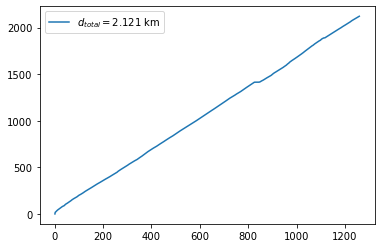

In [38]:
ruta_csv = './ArchivosCSV/'
lista = os.listdir(ruta_csv)
lista = mi_lista_csv(lista)
ind = 0
mi_mapa(lista[ind],ruta=ruta_csv)
mapa_html=ruta_csv+lista[ind][:-4]+'.html'
print(mapa_html)
marco = IFrame(src=mapa_html,width=250,height=250)
display(marco)
d,d_r,d_xyz = dist_mapa(ruta_csv+lista[ind])
plt.plot(d_r[0],d,label=r'$d_{total}=%2.3f$ km' %(d[-1]/1e3))
plt.legend()
plt.show()

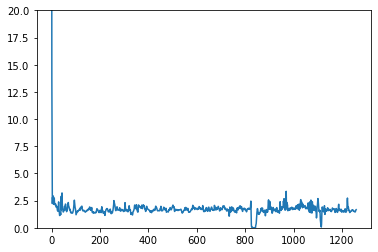

In [39]:
rap = deriv_sim(d,d_r[0])
plt.plot(d_r[0],rap)
plt.ylim([0,20])
plt.show()